# Data Analytics and Exploratory Fault type Analysis of Wind Turbine from IIoT Data

## 1. Import Packages
Import necessary package for data processing before starting the next step for EDA 

In [20]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np

# create an instance of the logger
logger = logging.getLogger()

# Change current directory to parent directory
import os
os.chdir("..")

# 2. Read Data
Read data from the data folder

Within the data folder, there is a raw data which includes all 3 datasets we have:

* `scada_data.csv`: Contains >60 information (or status) of wind turbine components recorded by SCADA system
* `fault_data.csv`: Contains wind turbine fault types (or modes)
* `status_data.csv`: Contains description of status of wind turbine operational

We further preprocessed(merged) the data for simplification and reusibility and save our datasets into the processed folder. Hence, we start exploring from our raw data and reading our processed data for our model. 

In [22]:
# Acess the raw data for EDA

TO_RAW_FOLDER = 'data/raw'
os.chdir(TO_RAW_FOLDER) # run it once. Comment this line when you directory of os.getcwd() is already in data/raw/


scada_df = pd.read_csv('scada.csv')
scada_df['DateTime'] = pd.to_datetime(scada_df['DateTime'], format = "%m/%d/%Y %H:%M")
scada_df.set_index('DateTime', inplace=True)

print(scada_df.head())

status_df = pd.read_csv('status.csv')
status_df['Time'] = pd.to_datetime(status_df['Time'])
status_df.rename(columns={'Time': 'DateTime'}, inplace=True)
status_df.set_index('DateTime', inplace=True)

print(status_df.head())

fault_df = pd.read_csv('fault.csv')
fault_df['DateTime'] = pd.to_datetime(fault_df['DateTime'])
fault_df.set_index('DateTime', inplace=True)

print(fault_df.head())

                           Time  Error  WEC: ava. windspeed  \
DateTime                                                      
2014-05-01 00:00:00  1398920448      0                  6.9   
2014-05-01 00:09:00  1398920960      0                  5.3   
2014-05-01 00:20:00  1398921600      0                  5.0   
2014-05-01 00:30:00  1398922240      0                  4.4   
2014-05-01 00:39:00  1398922752      0                  5.7   

                     WEC: max. windspeed  WEC: min. windspeed  \
DateTime                                                        
2014-05-01 00:00:00                  9.4                  2.9   
2014-05-01 00:09:00                  8.9                  1.6   
2014-05-01 00:20:00                  9.5                  1.4   
2014-05-01 00:30:00                  8.3                  1.3   
2014-05-01 00:39:00                  9.7                  1.2   

                     WEC: ava. Rotation  WEC: max. Rotation  \
DateTime                               

In [24]:
# os.chdir('..') # run it once. Comment this line when you directory of os.getcwd() is already in Team-2-2024Fall
print(os.getcwd())

c:\Users\teren\OneDrive\桌面\Rice\Course\2024Fall\BUSI7QuantitativeResearch\1221github\Team-2-2024Fall


In [25]:
# Define global variables
RAW_PATH_MODEL_DATA = 'data/processed/merged_with_season.csv'

# Check if the file exists
if os.path.exists(RAW_PATH_MODEL_DATA):
    # Load the file
    model_data = pd.read_csv(RAW_PATH_MODEL_DATA)
    print(model_data.head())
else:
    print("File not found:", RAW_PATH_MODEL_DATA)

              DateTime    Time_fault Fault  Time_scada  Error  \
0  2014-05-14 14:39:44  1.400096e+09    GF         NaN    NaN   
1  2014-05-14 14:50:24  1.400097e+09    GF         NaN    NaN   
2  2014-05-14 14:58:56  1.400098e+09    GF         NaN    NaN   
3  2014-05-14 15:09:36  1.400098e+09    GF         NaN    NaN   
4  2014-05-14 15:20:16  1.400099e+09    GF         NaN    NaN   

   WEC: ava. windspeed  WEC: max. windspeed  WEC: min. windspeed  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   WEC: ava. Rotation  WEC: max. Rotation  ...  Main Status  Sub Status  \
0                 NaN                 NaN  ...          NaN         NaN   
1                 NaN                 NaN  ...    

C:\Users\teren\AppData\Local\Temp\ipykernel_37292\3408438960.py:7: DtypeWarning: Columns (2,70,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  model_data = pd.read_csv(RAW_PATH_MODEL_DATA)


# 3. Analyze Data

# 3.1 Scada Data (Data time period analysis)
The 3 data have different time spans. The status data has the longest record timespan from January 2014 to December 2015. The shortest is SCADA data from April 2014 to April 2015. Therefore, when seeing the SCADA records, we can refer to status and fault data to see what happens on the turbine at certain timestamps.

(0.0, 4.0)

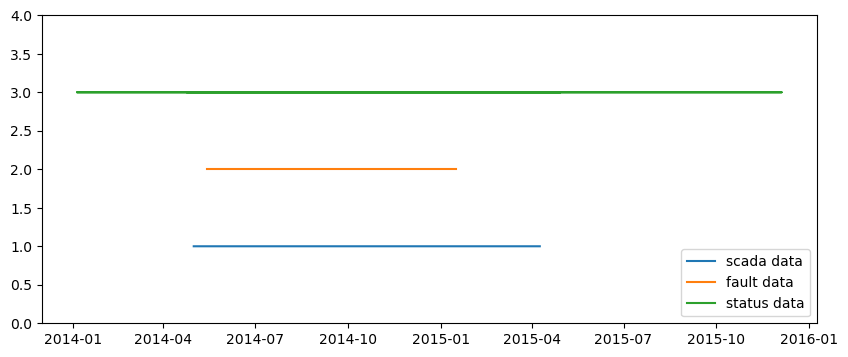

In [26]:
# Plot time span of all data
t_scada = scada_df.index
t_fault = fault_df.index
t_status = status_df.index

plt.figure(figsize=(10,4))
plt.plot(t_scada, np.full(len(scada_df), 1), label='scada data')
plt.plot(t_fault, np.full(len(fault_df), 2), label='fault data')
plt.plot(t_status, np.full(len(status_df), 3), label='status data')
plt.legend(loc='lower right')
plt.ylim(0,4)

<Axes: xlabel='DateTime'>

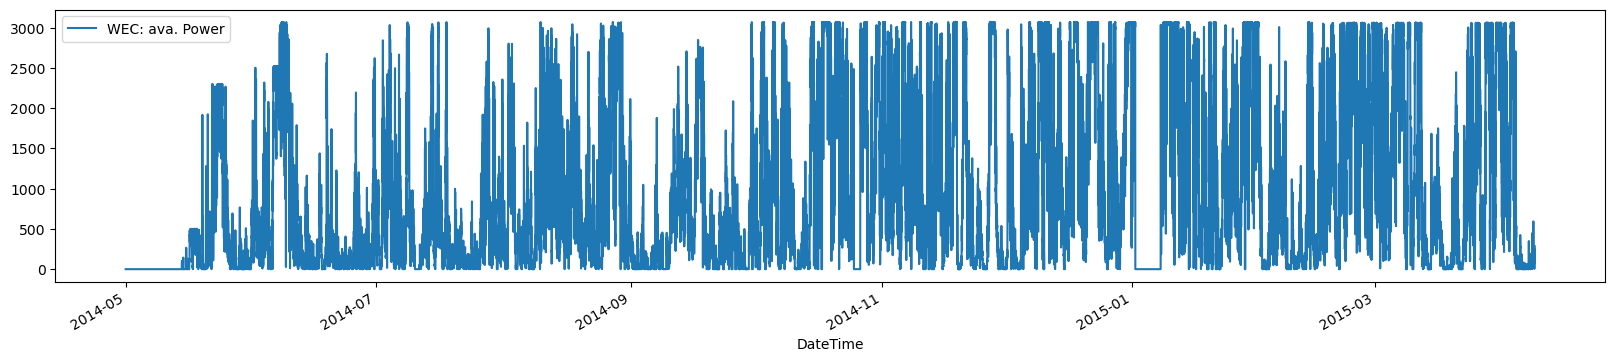

In [27]:
# Plot of max power from SCADA data
scada_df.plot(y='WEC: ava. Power', figsize=(20,4))

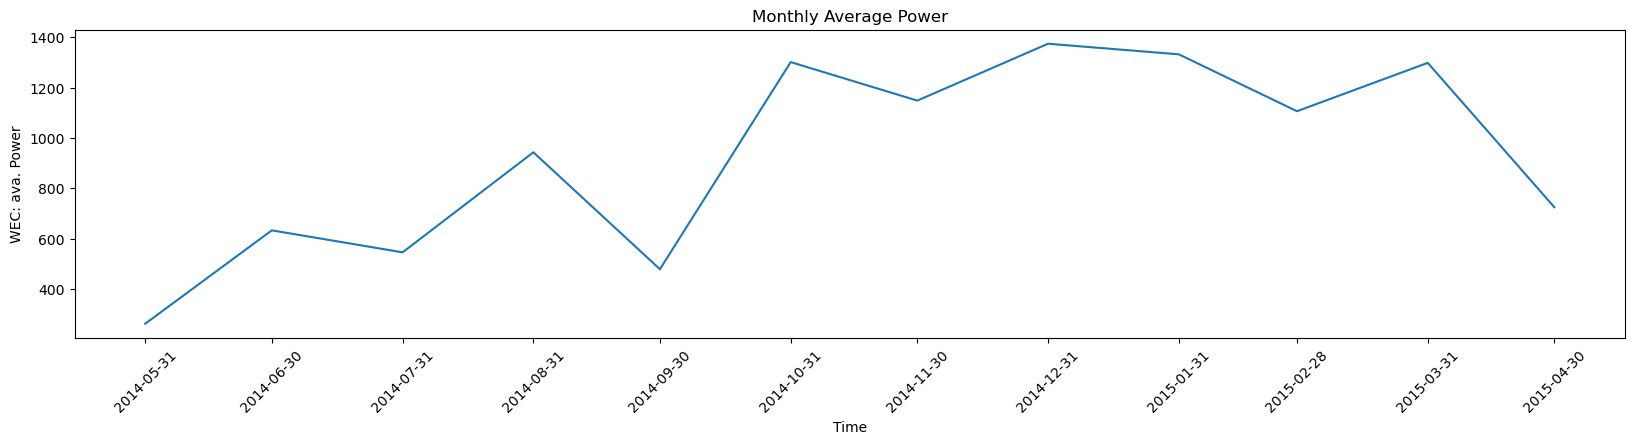

In [28]:
# Plot of avg power output generated by the wind turbine on a monthly basis

monthly_scada_df = scada_df.resample("M").mean()
plt.figure(figsize=(20, 4))
plt.plot(monthly_scada_df.index, monthly_scada_df['WEC: ava. Power'])

# Customize x-axis labels
plt.xticks(monthly_scada_df.index, rotation=45)

# Set x-axis label
plt.xlabel('Time')
# Set y-axis label
plt.ylabel('WEC: ava. Power')
plt.title('Monthly Average Power')

plt.show()

From the above graph, we notice that from October to March, we can observe a rising trend of power generated by wind turbine and stay on a high pleatue
There were times when power dropped, for example in October 2014, December 2014, and the most significant in January 2015. However, by monthly average of the generated power, we can conclude that in Winter and Spring we have relatively higher power that can be sold.

The number of wind turbine faults significantly increases on October 2014.

## 3.2 Fault type analysis

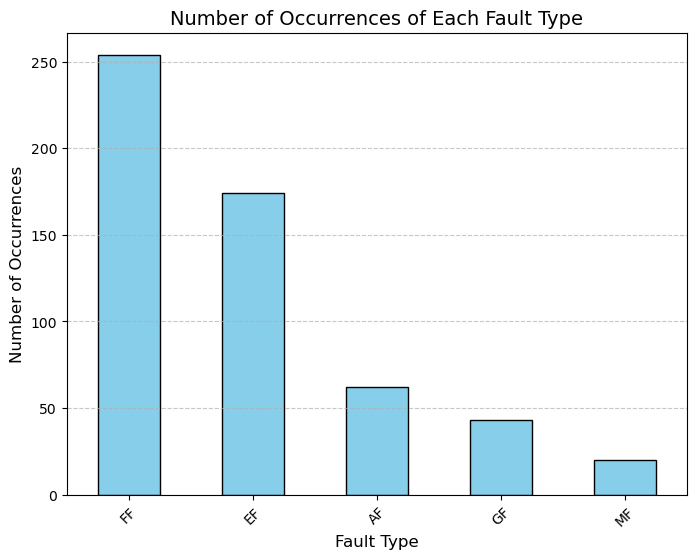

In [29]:
# Count the occurrences of each fault type
fault_counts = model_data['Fault'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
fault_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Occurrences of Each Fault Type', fontsize=14)
plt.xlabel('Fault Type', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**All types of faults**

- GF (Generator Heating Fault): Indicates overheating or related issues in the generator, which could suggest an overload or poor cooling in the generator unit.

- MF (Mains Failure Fault): Reflects a failure in the main power supply, likely causing interruptions or necessitating backup power.

- FF (Feeding Fault): Relates to issues in the feeding mechanism, which might impact fuel or resource input, affecting the system’s operation.

- AF (Air Cooling Fault): Points to problems with air cooling, likely resulting in increased temperatures if the cooling system is ineffective.

- EF (Excitation Fault): would typically relate to issues in the generator's excitation system, affecting voltage regulation.

There are 5 different fault types in total and the meaning of each fault type can be referenced from https://github.com/lkev/wt-fdd

Generator Heating Faults (GF) are the most frequent, highlighting potential inefficiencies in generator maintenance or cooling mechanisms. Mains Failure Faults (MF) follow, reflecting challenges with the main power supply and possible reliance on external infrastructure. Feeding Faults (FF), though less common, remain significant, pointing to issues in the feeding mechanism that could impact system efficiency. Air Cooling Faults (AF) occur infrequently, but their presence underscores the importance of preventive maintenance to mitigate overheating risks. Excitation Faults (EF) are the rarest, suggesting the excitation system's reliability, though any occurrence could critically affect voltage regulation.

### Monthly Fault Counts Analysis


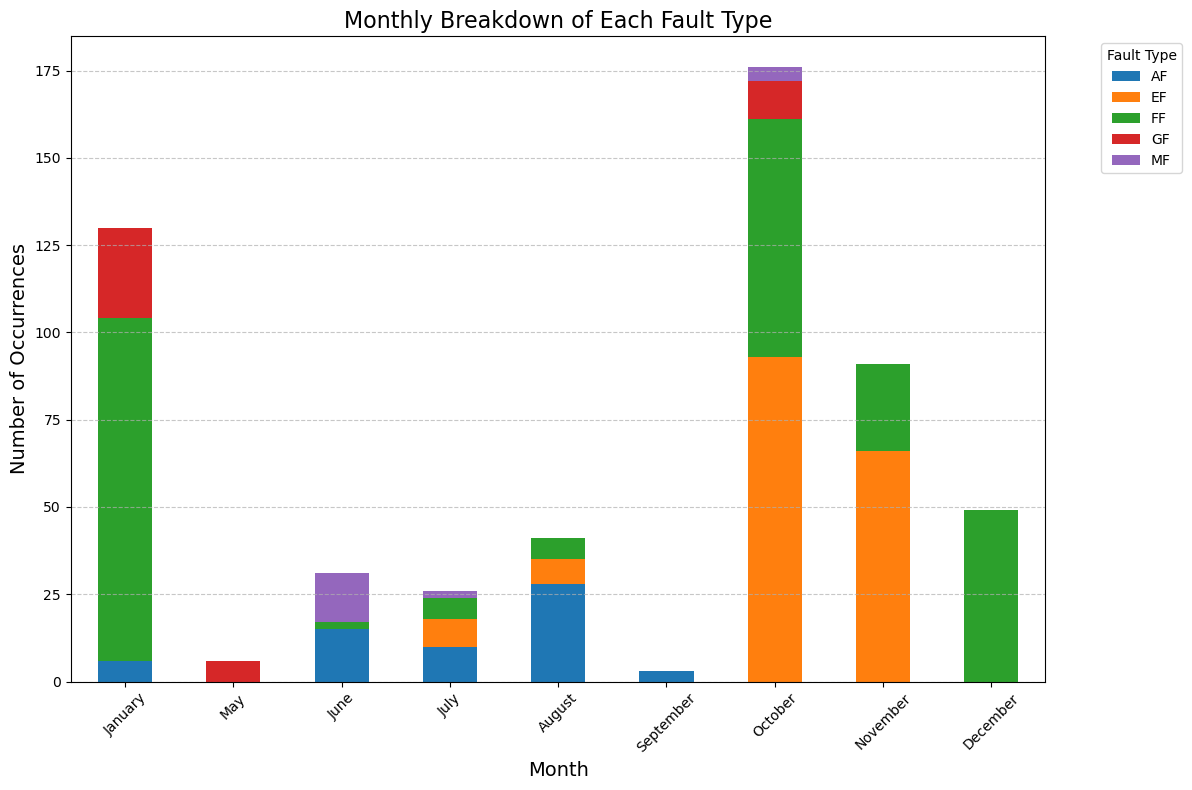

In [4]:
# Extract month names for better readability
model_data['Month'] = pd.to_datetime(model_data['DateTime']).dt.month_name()

# Group by Fault type and Month to count occurrences
fault_monthly_counts = model_data.groupby(['Fault', 'Month']).size().unstack(fill_value=0)

# Reorder months for logical sequence
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# Dynamically reorder months based on available data
available_months = fault_monthly_counts.columns.tolist()
ordered_months = [month for month in month_order if month in available_months]
fault_monthly_counts = fault_monthly_counts[ordered_months]

# Plotting each fault type breakdown per month again
fault_monthly_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Breakdown of Each Fault Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Based on the plot above and previous analysis of the Scada data, we observe that there are more faults in high production season(from 2014 winter to 2015 spring). 
Such a finding aligns with ours expectation, since more power generated means more workload on the turbine and this can possibly lead to more frequent faults and more intense maintainence.

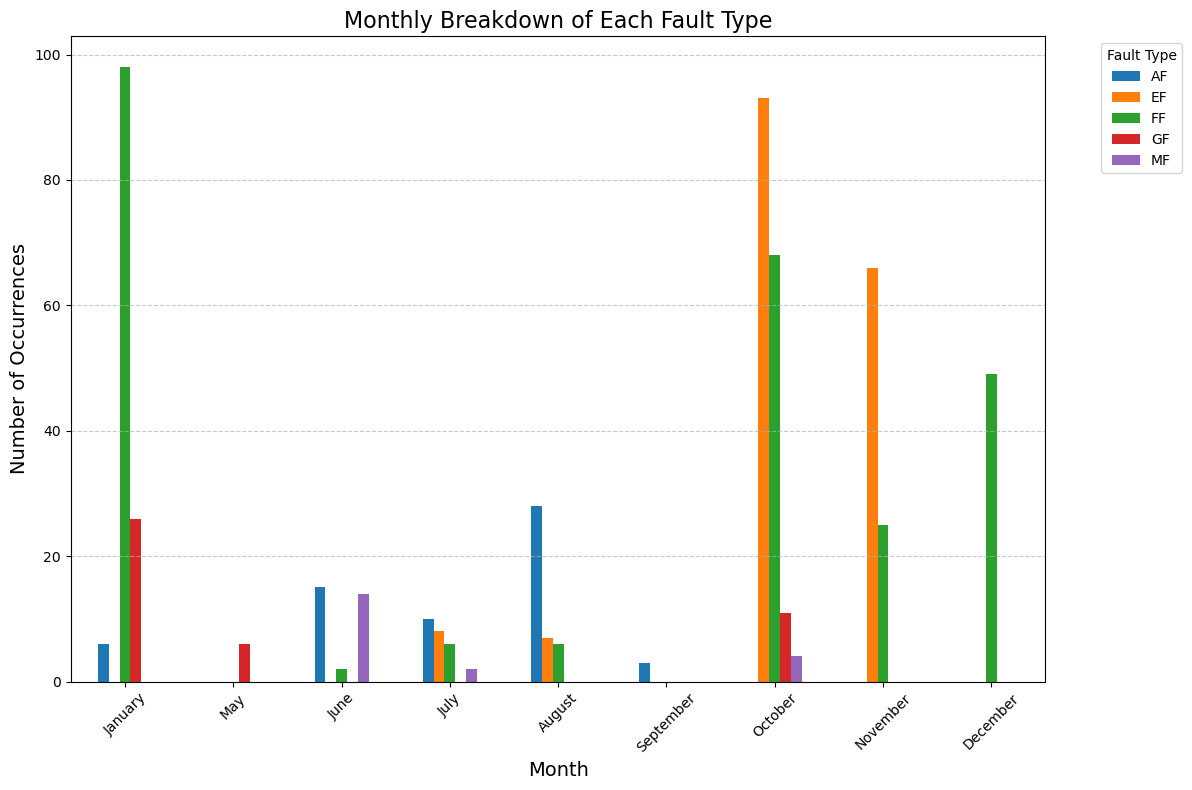

In [11]:
# Extract month names for better readability
model_data['Month'] = pd.to_datetime(model_data['DateTime']).dt.month_name()

# Group by Fault type and Month to count occurrences
fault_monthly_counts = model_data.groupby(['Fault', 'Month']).size().unstack(fill_value=0)

# Reorder months for logical sequence
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# Dynamically reorder months based on available data
available_months = fault_monthly_counts.columns.tolist()
ordered_months = [month for month in month_order if month in available_months]
fault_monthly_counts = fault_monthly_counts[ordered_months]

# Plotting each fault type breakdown per month again
fault_monthly_counts.T.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Monthly Breakdown of Each Fault Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.legend(title='Fault Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### High and Low Months Analysis Based on the Graph

### High Months:
#### January:
- January has a significantly high occurrence of faults, dominated by **Feeding Faults (FF)**.
- Possible reasons for this spike include:
  - Operational strain after holidays or downtime.
  - Environmental conditions impacting fuel/resource input systems.

#### October:
- October also shows a very high number of faults, particularly **Air Cooling Faults (AF)** and **Feeding Faults (FF)**.
- The spike in **AF** suggests:
  - Cooling systems may be under stress due to high operational loads or environmental factors like dry or hot weather.

---

### Low Months:
#### May and September:
- Fault occurrences are minimal in these months across all fault types.
- Indicates stable operations, potentially due to:
  - Favorable environmental conditions.
  - Effective maintenance schedules.

#### July and August:
- Occurrences are relatively sparse, with a few **Excitation Faults (EF)** and **Air Cooling Faults (AF)**.
- This suggests a moderately stable period with occasional issues, possibly related to weather or load fluctuations.

This analysis highlights January and October as critical months for fault management. January experiences a surge in Feeding Faults (FF), likely due to operational strain following holidays, while October sees a peak in Air Cooling Faults (AF), suggesting cooling systems struggle under seasonal environmental stress. Feeding Faults (FF) emerge as a recurring and significant issue across high months, necessitating targeted preventive measures. In contrast, low-fault months such as May and September demonstrate the benefits of stable conditions and effective maintenance schedules, reinforcing the importance of optimizing operations during high-risk periods.

## 4. Cost Analysis of the External Maintenance

In [35]:
# Create a new column for the cost of external maintenance
model_data['Cost of External Maintenance'] = model_data['Season'].apply(
    lambda season: 50000 if season.lower() == 'low' else 150000 if season.lower() == 'high' else None
)

In [36]:
# Calculate the total cost of external maintenance for each fault type
fault_costs = model_data.groupby('Fault')['Cost of External Maintenance'].sum()

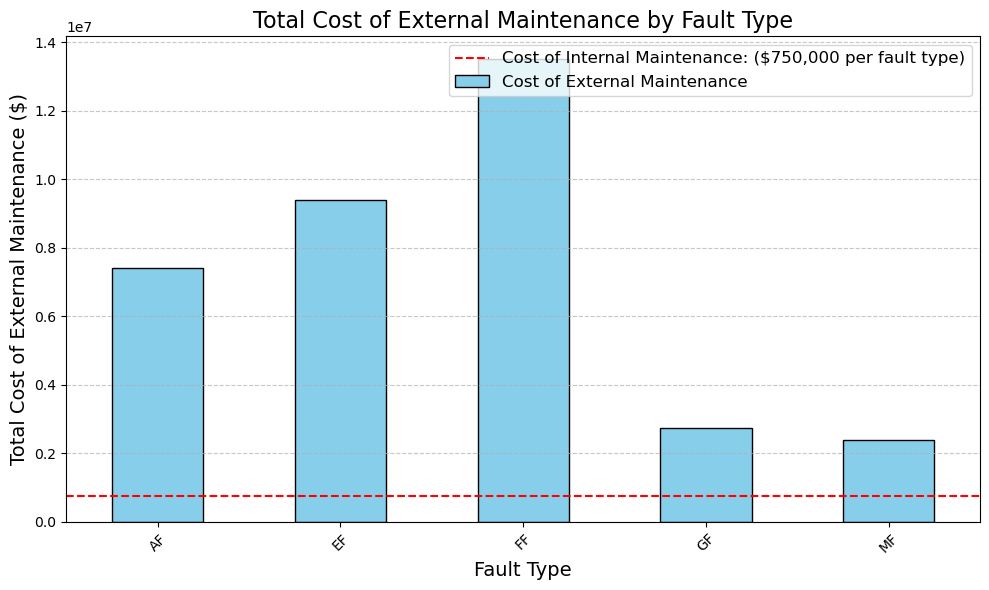

In [37]:
# Plot the fault type vs total cost of external maintenance
plt.figure(figsize=(10, 6))
fault_costs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=750000, color='red', linestyle='--', linewidth=1.5, label='Cost of Internal Maintenance: ($750,000 per fault type)')
plt.title('Total Cost of External Maintenance by Fault Type', fontsize=16)
plt.xlabel('Fault Type', fontsize=14)
plt.ylabel('Total Cost of External Maintenance ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
# Calculate the total cost of external maintenance
total_external_maintenance_cost = model_data['Cost of External Maintenance'].sum()

# Print the total cost
total_external_maintenance_cost

4937350000

In [34]:
#Cost of Internal Maintenance: ($750,000 per fault type)
# Calculate the total cost of internal maintenance
total_internal_maintenance_cost=5*750000

# Print the total cost
total_internal_maintenance_cost

3750000